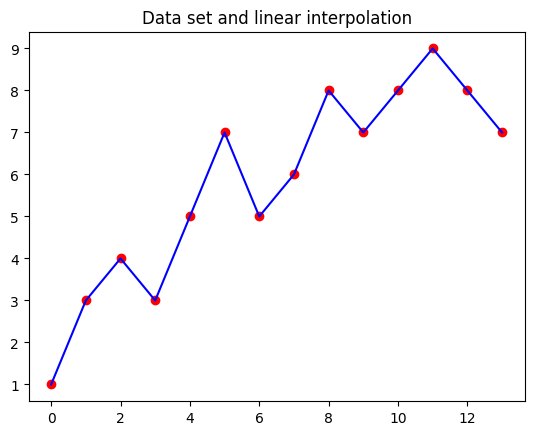

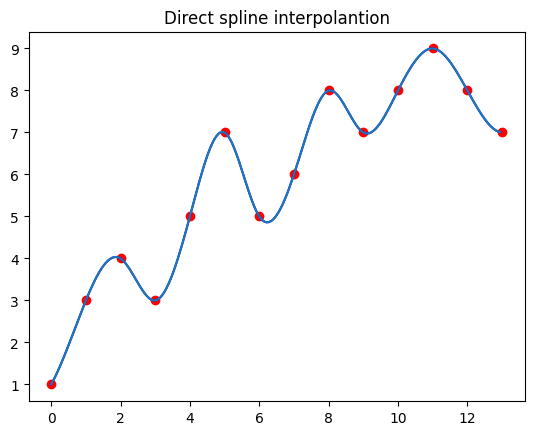

In [3]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np 
y = [1,3,4,3,5,7,5,6,8,7,8,9,8,7]
n = len(y)
x = range(0, n)
plt.plot(x,y,'ro')
plt.plot(x,y, 'b')
plt.title("Data set and linear interpolation")
plt.show() 
plt.figure()
tck = interpolate.splrep(x, y, s=0)
xfit = np.arange(0, n-1, np.pi/50)
yfit = interpolate.splev(xfit, tck, der=0)

plt.plot(x, y, 'ro')
plt.plot(xfit, yfit,'b')
plt.plot(xfit, yfit)
plt.title("Direct spline interpolantion")
plt.show() 

In [2]:
#Define useful functions
from pykalman import KalmanFilter
def Kalman1D(observations,damping=0):
    # To return the smoothed time series data
    observation_covariance = damping
    initial_value_guess = observations[0]
    transition_matrix = 1
    transition_covariance = 0.1
    initial_value_guess
    kf = KalmanFilter(
            initial_state_mean=initial_value_guess,
            initial_state_covariance=observation_covariance,
            observation_covariance=observation_covariance,
            transition_covariance=transition_covariance,
            transition_matrices=transition_matrix
        )
    pred_state, state_cov = kf.smooth(observations)
    return pred_state


def LCIS(arr):
    decrease_cnt = 0
    start_index = 0
    end_index = 0
    sub_len = 0
    longest_start = 0
    longest_end = 0
    longest_len = 0
    decrease_point_0 = -1
    decrease_point_1 = -1
    for i in range(1, len(arr)):
        if arr[i] > arr[i-1]:
            end_index += 1
        else:
            decrease_cnt += 1
            if decrease_cnt == 1:
                end_index += 1
                decrease_point_0 = end_index

            elif decrease_cnt == 2:
                end_index += 1
                decrease_point_1 = end_index
                
            else:
                sub_len = end_index - start_index + 1
                if longest_len < sub_len:
                    longest_len = sub_len
                    longest_start = start_index
                    longest_end = end_index
                start_index = decrease_point_0
                decrease_point_0 = decrease_point_1
                decrease_point_1 = i
                end_index = i
                decrease_cnt = 2

    sub_len = end_index - start_index + 1
    if longest_len < sub_len:
        longest_len = sub_len
        longest_start = start_index
        longest_end = end_index

    print('start index: {}, end index: {}, len: {}, LCIS: {}'.format(longest_start, longest_end, longest_len, arr[longest_start:longest_end+1]))
    
    longest_start = 42
    longest_end = 98
    return longest_start, longest_end+1, arr[longest_start:longest_end+1]
#     return 25, 40+1, arr[25:40+1]

In [13]:
#Define useful functions
from pykalman import KalmanFilter
def Kalman1D(observations,damping=0):
    # To return the smoothed time series data
    observation_covariance = damping
    initial_value_guess = observations[0]
    transition_matrix = 1
    transition_covariance = 0.1
    initial_value_guess
    kf = KalmanFilter(
            initial_state_mean=initial_value_guess,
            initial_state_covariance=observation_covariance,
            observation_covariance=observation_covariance,
            transition_covariance=transition_covariance,
            transition_matrices=transition_matrix
        )
    pred_state, state_cov = kf.smooth(observations)
    return pred_state


def LCIS(arr):
    decrease_cnt = 0
    start_index = 0
    end_index = 0
    sub_len = 0
    longest_start = 0
    longest_end = 0
    longest_len = 0
    decrease_point_0 = -1
    decrease_point_1 = -1
    for i in range(1, len(arr)):
        if arr[i] > arr[i-1]:
            end_index += 1
        else:
            decrease_cnt += 1
            if decrease_cnt == 1:
                end_index += 1
                decrease_point_0 = end_index

            elif decrease_cnt == 2:
                end_index += 1
                decrease_point_1 = end_index
                
            else:
                sub_len = end_index - start_index + 1
                if longest_len < sub_len:
                    longest_len = sub_len
                    longest_start = start_index
                    longest_end = end_index
                start_index = decrease_point_0
                decrease_point_0 = decrease_point_1
                decrease_point_1 = i
                end_index = i
                decrease_cnt = 2

    sub_len = end_index - start_index + 1
    if longest_len < sub_len:
        longest_len = sub_len
        longest_start = start_index
        longest_end = end_index

    print('start index: {}, end index: {}, len: {}, LCIS: {}'.format(longest_start, longest_end, longest_len, arr[longest_start:longest_end+1]))
#     mm = np.arange(longest_start, longest_end, 1)
#     c_max = max(arr)
#     c_min = min(arr)
#     hope_start = 42
#     hope_end=98
#     for i in range(hope_start,hope_end+1):
#         if i not in mm:
#             temp = (arr[i]-c_min)/(c_max-c_min)*c_max
#             arr[i] = temp

    start = longest_start
    end = longest_end
    longest_start = 42
    longest_end = 98
    return longest_start, longest_end+1,arr[longest_start:longest_end+1],start,end+1
#     return 25, 40+1, arr[25:40+1]

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_excel('./data3/I-V_data_25min_AAO_10min_Pb_ED_1h_180C_MAI_memory_8V_2.xlsx') #0.55
# df = pd.read_excel('./data3/I-V_data_30min_AAO_5min second etch_15min_Pb_ED_3h_180C_MAI_200nm_Ag_memory_6V.xlsx') #0.33
# df = pd.read_excel('./data3/I-V_data_25min_AAO_10min_Pb_ED_1h_180C_MAI_memory_8V.xlsx') #0.14


# df = pd.read_excel('./NEW/I-V_data_15min_AAO_10min_Pb_ED_1h_180C_MAI_memory_8V.xlsx')

#df = pd.read_excel('./new/I-V_data_15min_AAO_25min_Pb_ED_1h_180C_MAI_memory_8V.xlsx')

#print(df)
#data cleaning
dropcolumn = []
for i in range(len(df.columns)):
    if 'Unnamed' in df.columns[i]:
        dropcolumn.append(df.columns[i])
        

df = df.drop(columns=dropcolumn)

#calculate mean and std current for each row and remove the NAN
voltage = df['voltage']
current_mean_list = []
current_std_list = []
for i in range(len(voltage)):
    current_row = df.iloc[[i]].to_numpy()
    current_row = current_row[~np.isnan(current_row)]
    
    low_percentile = np.percentile(current_row, 25)
    high_percentile = np.percentile(current_row, 75)
    current_row = current_row[(current_row >=low_percentile ) & (current_row <= high_percentile)]
    
    current_mean = np.mean(current_row)
    
    
    current_std = np.std(current_row)
    current_mean_list.append(current_mean)
    current_std_list.append(current_std)

current_mean_list = np.array(current_mean_list)
current_std_list = np.array(current_std_list)

voltage_list = df['voltage'].to_numpy()

import matplotlib.pyplot as plt

conductance_mean = current_mean_list/(voltage_list+1e-9)
conductance_std  = current_std_list/(voltage_list+1e-9)

c_mean_smooth = conductance_mean[1:100] 

c_std_smooth = conductance_std[1:100]


c_mean_smooth = Kalman1D(c_mean_smooth,damping=1)
c_std_smooth  = Kalman1D(c_std_smooth,damping=1)


longest_start, longest_end, arr, start, end = LCIS(c_mean_smooth)

usability = (longest_end-longest_start)/100.*(1-sum(c_std_smooth)/sum(c_mean_smooth))

print("xxxxxxxxxxxxxxxxxxxxxxxxxx")
print(usability)

#Curve interpolations
x = np.arange(longest_start, longest_end, 1)
y = arr 
interp_func_mean = interpolate.splrep(x, y, s=0)


y_std = c_std_smooth[longest_start:longest_end]
interp_func_std = interpolate.splrep(x, y_std, s=0)



xfit = np.linspace(longest_start, longest_end, 100)
yfit = interpolate.splev(xfit, interp_func_mean, der=0)
yfit_std = interpolate.splev(xfit, interp_func_std, der=0) #计算取样点的插值结果




# y_p = []
# for i in range(len(yfit)):
#     y_p.append(1)
# mm = np.arange(start, end, 1)
# c_max = max(yfit)
# c_min = min(yfit)
# hope_start = 42
# hope_end=98
# for i in range(hope_start,hope_end+1):
#     if i not in mm:
#         temp = (yfit[i]-c_min)/(c_max-c_min)
#         y_p[i] = temp

# df_from_arr = pd.DataFrame({'SweepingTime':xfit,'Conductance_mean':yfit, 'Conductance_std':yfit_std, 
#                             'Conductance_std_ratio': yfit_std/(yfit+1e-9),'radio':y_p})


# df_from_arr.to_csv('0.14_ratio_hw_conductance_std.csv', index=False)

start index: 42, end index: 98, len: 57, LCIS: [[0.00221004]
 [0.00218904]
 [0.00217837]
 [0.00218559]
 [0.00220392]
 [0.00221873]
 [0.00223948]
 [0.00227   ]
 [0.00231423]
 [0.00237379]
 [0.00244709]
 [0.00253037]
 [0.00262232]
 [0.00272597]
 [0.00284914]
 [0.00299416]
 [0.00316638]
 [0.00338172]
 [0.00363988]
 [0.00394262]
 [0.0042854 ]
 [0.00466642]
 [0.00508621]
 [0.00553989]
 [0.00603953]
 [0.00657843]
 [0.00715626]
 [0.00777301]
 [0.00841297]
 [0.00906963]
 [0.00972992]
 [0.01036993]
 [0.01096343]
 [0.01147709]
 [0.01184739]
 [0.01210365]
 [0.01228815]
 [0.01243557]
 [0.01257647]
 [0.01272496]
 [0.01288004]
 [0.013041  ]
 [0.01320729]
 [0.01337844]
 [0.01355402]
 [0.01373358]
 [0.01391656]
 [0.01410222]
 [0.01428957]
 [0.01447722]
 [0.01466324]
 [0.01484491]
 [0.01501844]
 [0.01517858]
 [0.01531803]
 [0.01542669]
 [0.01549062]]
xxxxxxxxxxxxxxxxxxxxxxxxxx
[0.55172878]


In [ ]:
#计算ratio
def calculateRatio(Conductance_mean,True_start,True_end): #True_start和True_end是这个usability真实的最长递增子序列的start和end
    y_p = []
    for i in range(len(Conductance_mean)):
        y_p.append(1)
    mm = np.arange(True_start, True_end, 1) 
    c_max = max(Conductance_mean)
    c_min = min(Conductance_mean)

    #这里的hope_start和hope_end是我们人为修改的start和end，对usability小的会加入一段递减的区间
    hope_start = 42
    hope_end=98
    
    for i in range(hope_start,hope_end+1):
        if i not in mm:
            temp = (Conductance_mean[i]-c_min)/(c_max-c_min)
            y_p[i] = temp
    print(y_p)
    return y_p
    

In [31]:
#判断单调递增
def monotonic(array):
    size = len(array)
    if size <= 1: return True

    # 第一个数和最后一个数的方向，就是整个数组的单调方向
    # global_dir = array[0] <= array[-1]

    for i in range(size - 1):
        if array[i] == array[i + 1]:
            continue
        elif (array[i] < array[i + 1]) != True:
            print(i,array[i])
            return False
    return True

current mean [2.96936692e-07 3.31169164e-04 7.11522586e-04 1.22782960e-03
 1.83073267e-03 2.11746245e-03 2.32751350e-03 2.36693310e-03
 2.46594398e-03 2.40048906e-03 2.28267968e-03 2.25708047e-03
 2.30209832e-03 2.30452772e-03 2.33004120e-03 2.27716983e-03
 2.29603892e-03 2.25355106e-03 2.26449653e-03 2.26661889e-03
 2.25510029e-03 2.26310461e-03 2.26950001e-03 2.28386918e-03
 2.28226457e-03 2.25786491e-03 2.25575252e-03 2.28040692e-03
 2.27902438e-03 2.28389307e-03 2.25785193e-03 2.26007289e-03
 2.26269343e-03 2.26199661e-03 2.25407030e-03 2.25128507e-03
 2.24735022e-03 2.24981318e-03 2.24489193e-03 2.24623448e-03
 2.24783225e-03 2.24217382e-03 2.24313959e-03 2.25788924e-03
 2.24945184e-03 2.24687209e-03 2.25068668e-03 2.25239140e-03
 2.25882354e-03 2.25840167e-03 2.26260032e-03 2.26962317e-03
 2.28147593e-03 2.28948869e-03 2.30053607e-03 2.31978448e-03
 2.33554427e-03 2.42004767e-03 2.45089367e-03 2.46486792e-03
 2.52925833e-03 2.61344775e-03 2.65131558e-03 2.65365917e-03
 2.65424308

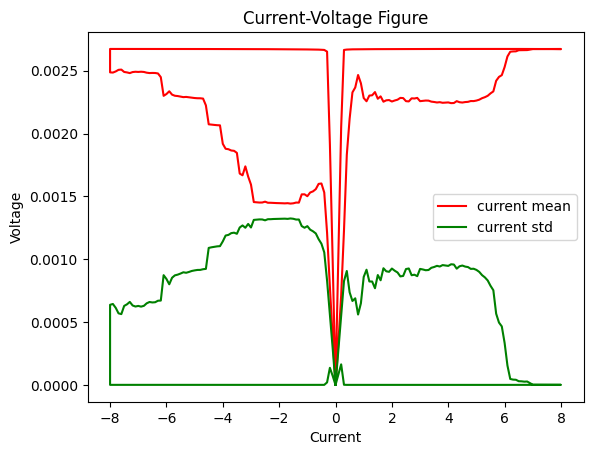

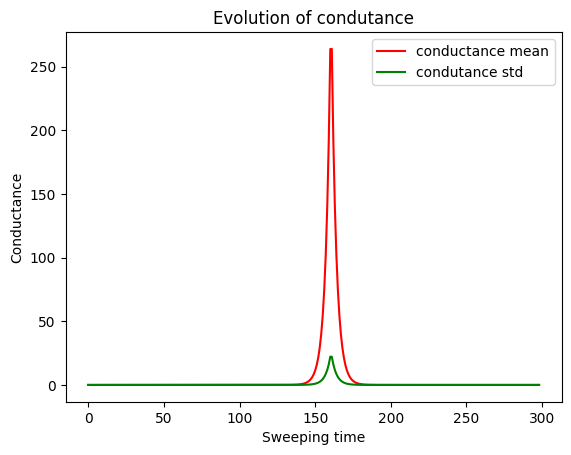

start index: 77, end index: 161, len: 85, LCIS: [[3.49666927e-04]
 [3.47536106e-04]
 [3.46322666e-04]
 [3.46327057e-04]
 [3.47571670e-04]
 [3.49750535e-04]
 [3.52644550e-04]
 [3.56095946e-04]
 [3.59991379e-04]
 [3.64250016e-04]
 [3.68815097e-04]
 [3.73646966e-04]
 [3.78719175e-04]
 [3.84015074e-04]
 [3.89525425e-04]
 [3.95247107e-04]
 [4.01181872e-04]
 [4.07335791e-04]
 [4.13719047e-04]
 [4.20346583e-04]
 [4.27238059e-04]
 [4.34419148e-04]
 [4.41923322e-04]
 [4.49793889e-04]
 [4.58087093e-04]
 [4.66876789e-04]
 [4.76260424e-04]
 [4.86367241e-04]
 [4.97370153e-04]
 [5.09501230e-04]
 [5.23073339e-04]
 [5.38509736e-04]
 [5.56384194e-04]
 [5.77476340e-04]
 [6.02847289e-04]
 [6.33942900e-04]
 [6.72736306e-04]
 [7.21922250e-04]
 [7.85183387e-04]
 [8.67554865e-04]
 [9.75924152e-04]
 [1.11971559e-03]
 [1.31182868e-03]
 [1.56992301e-03]
 [1.91817883e-03]
 [2.38970899e-03]
 [3.02986340e-03]
 [3.90075726e-03]
 [5.08747414e-03]
 [6.70656543e-03]
 [8.91769510e-03]
 [1.19395950e-02]
 [1.60719251e-02

ValueError: x and y must have same first dimension, but have shapes (99,) and (299, 1)

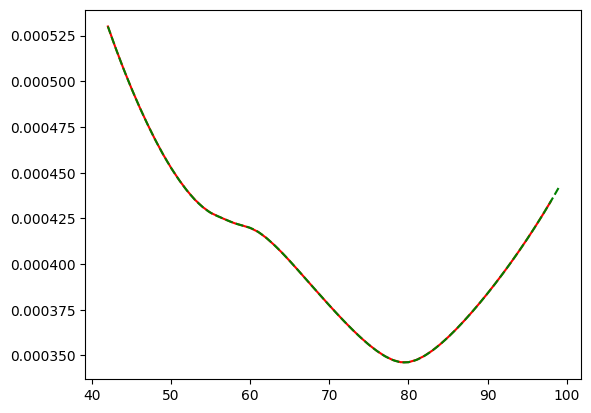

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# df = pd.read_excel('./data3/I-V_data_25min_AAO_10min_Pb_ED_1h_180C_MAI_memory_8V_2.xlsx') #0.55
# df = pd.read_excel('./data3/I-V_data_30min_AAO_5min second etch_15min_Pb_ED_3h_180C_MAI_200nm_Ag_memory_6V.xlsx') #0.33
df = pd.read_excel('./data3/I-V_data_25min_AAO_10min_Pb_ED_1h_180C_MAI_memory_8V.xlsx') #0.14


# df = pd.read_excel('./NEW/I-V_data_15min_AAO_10min_Pb_ED_1h_180C_MAI_memory_8V.xlsx')

#df = pd.read_excel('./new/I-V_data_15min_AAO_25min_Pb_ED_1h_180C_MAI_memory_8V.xlsx')

#print(df)
#data cleaning
dropcolumn = []
for i in range(len(df.columns)):
    if 'Unnamed' in df.columns[i]:
        dropcolumn.append(df.columns[i])
        

df = df.drop(columns=dropcolumn)

#calculate mean and std current for each row and remove the NAN
voltage = df['voltage']
current_mean_list = []
current_std_list = []
for i in range(len(voltage)):
    current_row = df.iloc[[i]].to_numpy()
    current_row = current_row[~np.isnan(current_row)]
    
    low_percentile = np.percentile(current_row, 25)
    high_percentile = np.percentile(current_row, 75)
    current_row = current_row[(current_row >=low_percentile ) & (current_row <= high_percentile)]
    
    current_mean = np.mean(current_row)
    
    
    current_std = np.std(current_row)
    current_mean_list.append(current_mean)
    current_std_list.append(current_std)

current_mean_list = np.array(current_mean_list)
current_std_list = np.array(current_std_list)

print('current mean', current_mean_list)
print('current std',current_std_list)
voltage_list = df['voltage'].to_numpy()

import matplotlib.pyplot as plt

print(current_mean_list)
plt.figure()
plt.title('Current-Voltage Figure')
plt.plot(voltage_list, current_mean_list, 'r-', label='current mean')
plt.plot(voltage_list, current_std_list, 'g-', label='current std')
plt.xlabel('Current')
plt.ylabel('Voltage')
plt.legend()
plt.show()


plt.figure()
plt.title('Evolution of condutance')
conductance_mean = current_mean_list/(voltage_list+1e-9)
conductance_std  = current_std_list/(voltage_list+1e-9)

c_mean_smooth = conductance_mean[1:300] 

c_std_smooth = conductance_std[1:300]


c_mean_smooth = Kalman1D(c_mean_smooth,damping=1)
c_std_smooth  = Kalman1D(c_std_smooth,damping=1)

plt.plot(c_mean_smooth, 'r-', label='conductance mean')
plt.plot(c_std_smooth, 'g-', label='condutance std')
plt.xlabel('Sweeping time')
plt.ylabel('Conductance')

plt.legend()
plt.show()



longest_start, longest_end, arr, start, end = LCIS(c_mean_smooth)
print(longest_start, longest_end)

usability = (longest_end-longest_start)/100.*(1-sum(c_std_smooth)/sum(c_mean_smooth))

print("xxxxxxxxxxxxxxxxxxxxxxxxxx")
print(usability)

#Curve interpolations
x = np.arange(longest_start, longest_end, 1)
y = arr 
print(y)
interp_func_mean = interpolate.splrep(x, y, s=0)


y_std = c_std_smooth[longest_start:longest_end]
interp_func_std = interpolate.splrep(x, y_std, s=0)



xfit = np.linspace(longest_start, longest_end, 100)
yfit = interpolate.splev(xfit, interp_func_mean, der=0)
yfit_std = interpolate.splev(xfit, interp_func_std, der=0) #计算取样点的插值结果

# print('y',y)
print('yfit', yfit)

# print(x)





x_or = np.arange(1, 100, 1)
y_or = c_mean_smooth
plt.figure()

plt.plot(x, y, 'r-', label='separated points')
plt.plot(xfit, yfit, 'g--', label='fitted points')
plt.plot(x_or, y_or, 'blue', label='original points')
plt.title('usability=0.55')
plt.xlabel("x")
plt.ylabel("conductance mean")

# plt.axvline(x=longest_start,ymin=0,ymax=1,color='k',linestyle='dashed')
# plt.axvline(x=longest_end,ymin=0,ymax=1,color='k',linestyle='dashed')

plt.show()

x_sigma = []
for i in range(100):
    x_sigma.append(i)
y_sigma = np.log(1+np.square(yfit_std/yfit))
print(x_sigma)
print(y_sigma)

# y_p = []
# for i in range(len(yfit)):
#     y_p.append(1)
# mm = np.arange(start, end, 1)
# c_max = max(yfit)
# c_min = min(yfit)
# hope_start = 42
# hope_end=98
# for i in range(hope_start,hope_end+1):
#     if i not in mm:
#         temp = (yfit[i]-c_min)/(c_max-c_min)
#         y_p[i] = temp
#         print(y_p[i])

plt.figure()
plt.plot(x_sigma, y_sigma, 'r-', label='related sigma')

plt.show()


       
plt.figure()
plt.plot(y_p,yfit, 'r-', label='weight')

plt.show()

print(y_p)
df_from_arr = pd.DataFrame({'SweepingTime':xfit,'Conductance_mean':yfit, 'Conductance_std':yfit_std, 
                            'Conductance_std_ratio': yfit_std/(yfit+1e-9),'radio':y_p})


print(df_from_arr)

'''
Conductance_mean = current_mean_list/(voltage_list+1e-9)
plt.figure()
plt.title('Conductance_mean')
plt.plot(Conductance_mean[1:100])


Conductance_std = current_std_list/(voltage_list+1e-9)
plt.title('Conductance_std')


plt.plot(Conductance_std[1:100])


plt.show()

print('mean', Conductance_mean[1:100])
print('std', Conductance_std[1:100])

print(df.iloc[0].values)
print(df.iloc[1].values)

period = 82

U = df.iloc[0].values[period*3:period*100]
I = df.iloc[1].values[period*3:period*100]

print('U', df.iloc[0].values[period*3])
R = U/(I+1e-8)

#plt.plot(U, I, '*')
plt.plot(R, 'o')
plt.title('Resistance')
plt.xlabel('Measured time'

#calculate the usable range
'''

'''
weight_new = weight + weight*N(0, sigma)

sigma = Condutance_std[weight/weight_max*Length]
'''
# df_from_arr.to_csv('0.14_ratio_hw_conductance_std.csv', index=False)

In [51]:
#Error sources: 
#1.Charging errors
#2.Stability errors
#Optimization objective: accuracy over a life cycle 
#Steps: 
#1.Select the usable range for memristor, high conductance area is highly unstable
#2.Determine 



#Simulation system steps
#1.Construct empirical characteristics curves
#2.For each point at the empirical characteristics curves, we can have a quotient error estimation


<ipython-input-157-dfccb67bdca5>:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1.0/R, 'o')


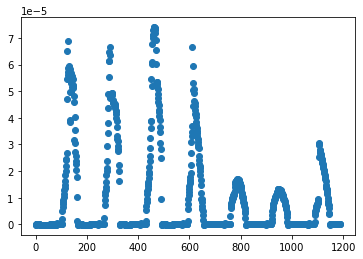

6


<ipython-input-157-dfccb67bdca5>:7: RuntimeWarning: divide by zero encountered in true_divide
  conductance_history = 1.0/R


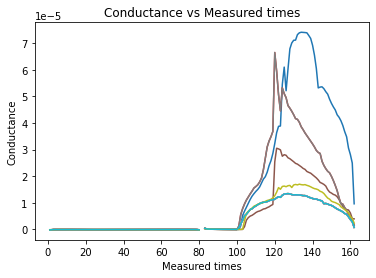

conductance at the point [4.30613e-05, 7.66733e-06, 7.66733e-06, 1.4585200000000002e-05, 7.66733e-06, 1.22886e-05, 7.66733e-06, 1.4585200000000002e-05, 9.74977e-06, 7.66733e-06]


0.7768737752108579

In [157]:
import random
import numpy as np

plt.plot(1.0/R, 'o')
plt.show()
#calculate the usable range
conductance_history = 1.0/R


'''
plt.plot(conductance_history[:2*period], '-', color='green')
plt.plot(conductance_history[2*period:4*period], '-', color='red')
plt.plot(conductance_history[4*period:6*period], '-', color='blue')
plt.plot(conductance_history[6*period:8*period], '-', color='cyan')
'''


plt.show()


#empirical function for conductance under charging
choice = random.randint(0, 10)*2
print(choice)
conductance_function = conductance_history[choice*period:(choice+2)*period]


#plt.plot(conductance_function, '-', color='cyan')
#plt.show()


#generate noise scales for different positions
#determine the maximum charging pulse number
#How to consider the neural network quantization or do not consider (can be used for general computation)?

max_charge = 160
min_charge = 150

def noiseratio(w, MC=10, empirical=False):
    '''
    Return the noise ratio
    empirical indicates whether the empirical nosie ratio is used
    '''
    if empirical == True:
        raise NotImplementedError
    if w>1:
        raise ValueError
    charge_t = min_charge + int( (max_charge-min_charge)*w)
    conductance = []
    for idx in range(MC):
        choice = random.randint(2, 6)*2
        conductance_function = conductance_history[choice*period:(choice+2)*period]
        plt.plot(conductance_function, '-')
        #print('conductance_function', len(conductance_function))
        conductance.append(conductance_function[charge_t])
        
    plt.xlabel('Measured times')
    plt.ylabel('Conductance')
    plt.title('Conductance vs Measured times')
    plt.show()
    print('conductance at the point', conductance)
    noiseratio= np.std(conductance)/np.mean(conductance)
    return noiseratio

noiseratio(0.3)


In [158]:
#implement a vector product
#implement a matrix vector product

#Bits of computation

#Normalized inputs

x = [0.1, 0.2, 0.3, 0.5, 1]
w = [0.3, 0.5, 0.6, 0.7, 1]

#calculate the relative quotient of weight with regard to the maximum weight


#add different scales of noises according to the conductance function


#The optimization inherently is to optimize the distributions of weights to 
#be adapted to the characteristic function of the memristor


In [159]:
#Train a digit classification model
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)
    
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

train_losses = []
test_losses = []
train_counter = []
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        train_losses.append(loss.item())
        train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
        torch.save(network.state_dict(), './model.pth')
        torch.save(optimizer.state_dict(), './optimizer.pth')

def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()
    
    

<ipython-input-159-9bf5951a7b4e>:54: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.371851
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.366941
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.253084
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.258119
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.279200
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.284118
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.224426
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.182901
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.092957
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.014003
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.066881
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.937319
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.780319
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.727874
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.722512
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.627028
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.649040
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.316883
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.216458
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.313535
Train Epoch: 1 [12800/60000 (

/Users/lincoln/opt/anaconda3/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.2096, Accuracy: 9398/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.371161
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.718154
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.331867
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.743933
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.515382
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.469312
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.476780
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.229633
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.692707
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.822624
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.450785
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.421058
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.510686
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.501835
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.345627
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.338470
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.390973
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.374850
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.241496
Train Epoch: 2 [12160

In [162]:
MC = 10
conductance_function_list = []
for idx in range(MC):
    choice = random.randint(2, 6)*2
    conductance_function_list.append(conductance_history[choice*period:(choice+2)*period])

    
conductance_function = torch.FloatTensor(conductance_function_list)

print(conductance_function_list)
conductance_function_mean = torch.mean(conductance_function, 0)
#conductance_function_mean.shape
conductance_function_std = torch.std(conductance_function, 0)


[array([            inf, -1.74505800e-07, -1.15192500e-07, -5.81686000e-08,
       -5.75962500e-08, -4.23518000e-08, -4.46063333e-08, -5.95214286e-08,
       -5.20812500e-08, -4.62944444e-08, -4.53903000e-08, -3.78772727e-08,
       -4.24818333e-08, -4.35123846e-08, -4.17348571e-08, -4.26778000e-08,
       -4.11746250e-08, -4.42309412e-08, -3.86692222e-08, -3.76143684e-08,
       -3.75963000e-08, -3.66929524e-08, -3.67184091e-08, -3.51219565e-08,
       -3.59868750e-08, -3.67825600e-08, -3.68006538e-08, -3.75072593e-08,
       -3.74981786e-08, -3.49205517e-08, -3.56192000e-08, -3.62729032e-08,
       -3.33930000e-08, -3.74609091e-08, -3.63591176e-08, -3.58525714e-08,
       -3.64088889e-08, -3.69351351e-08, -3.69434211e-08, -3.74289744e-08,
       -3.64932500e-08, -5.18600000e-08, -4.41153846e-08, -4.08647368e-08,
       -3.79418919e-08, -3.74436111e-08, -3.74491429e-08, -3.58114706e-08,
       -3.40745455e-08, -3.16467500e-08, -3.26676129e-08, -3.06521333e-08,
       -3.17091034e-08, 

In [137]:
def noiseratio(w, MC=10, empirical=False):
    '''
    Return the noise ratio
    empirical indicates whether the empirical nosie ratio is used
    '''
    if empirical == True:
        raise NotImplementedError
    if w>1:
        raise ValueError
    charge_t = min_charge + int( (max_charge-min_charge)*w)
    conductance = []
    for idx in range(MC):
        choice = random.randint(2, 6)*2
        conductance_function = conductance_history[choice*period:(choice+2)*period]
        plt.plot(conductance_function, '-')
        #print('conductance_function', len(conductance_function))
        conductance.append(conductance_function[charge_t])
        
    plt.xlabel('Measured times')
    plt.ylabel('Conductance')
    plt.title('Conductance vs Measured times')
    plt.show()
    print('conductance at the point', conductance)
    noiseratio= np.std(conductance)/np.mean(conductance)
    return noiseratio





def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def add_noise_to_weights(mean, std, model, device='cpu'):
    """
    with torch.no_grad():
        if hasattr(m, 'weight'):
            m.weight.add_(torch.randn(m.weight.size()) * 0.1)
    """
    gassian_kernel = torch.distributions.Normal(mean, std)
    with torch.no_grad():
        for param in model.parameters():
            print(torch.max(torch.abs(param)))
            
            absparam = torch.abs(param)
            normalized_param = absparam / (torch.max(absparam)+1e-8)
            
            
            #add different scales of Gaussian noises according to the normalized_scales
            #0.1=>noise at 0.1, 0.2=>noise at 0.2
            param.mul_(to_device(torch.exp(gassian_kernel.sample(param.size())), device))

def validation_step(model, batch):
    images, labels = batch
    out = model(images)  # Generate predictions
    loss = F.cross_entropy(out, labels)  # Calculate loss
    acc = accuracy(out, labels)  # Calculate accuracy
    return {'val_loss': loss.detach(), 'val_acc': acc}

'''
@torch.no_grad()
def evaluate(model, val_loader):
    # Tell PyTorch validation start, disable all regularization
    model.eval()
    # Take a Batch loss and Accuracy and Average through all the batches  
    outputs = [validation_step(model, batch) for batch in val_loader]
    return validation_epoch_end(outputs)
'''

@torch.no_grad()
def evaluate(model, val_loader):
    network = model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in val_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
    return {'val_acc':100. * correct / len(test_loader.dataset)}
    
            
def evaluate_robustness(model, model_path, valid_dl):
    # Pick different value for sigma
    sigma = np.linspace(0.1, 1.5, 31)

    # Initialize Empty list for accuracy under different std
    accu = []

    # Run several time for a smoother curve
    num = 1
    evaluated = np.zeros(num)

    for std in sigma:
        for i in range(num):
            model.load_state_dict(torch.load(model_path))
            print('std', std)
            add_noise_to_weights(0, std, model)
            evaluated[i] = evaluate(model, valid_dl)['val_acc']
        print("Finshed sigma=", std, np.sum(evaluated) / num)
        accu.append(np.sum(evaluated) / num)
    return sigma, accu

add_noise_to_weights(0, 1.0, network)
evaluate_robustness(network, './model.pth', test_loader)

tensor(15.8503)
tensor(0.2789)
tensor(5.5925)
tensor(0.0800)
tensor(8.1517)
tensor(1.3238)
tensor(3.0556)
tensor(0.6634)
std 0.1
tensor(0.5222)
tensor(0.2002)
tensor(0.1879)
tensor(0.0568)
tensor(0.1589)
tensor(0.0858)
tensor(0.3407)
tensor(0.1106)


<ipython-input-118-ace4a00ad5c8>:54: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.1044, Accuracy: 9668/10000 (97%)

Finshed sigma= 0.1 96.68000030517578
std 0.14666666666666667
tensor(0.5222)
tensor(0.2002)
tensor(0.1879)
tensor(0.0568)
tensor(0.1589)
tensor(0.0858)
tensor(0.3407)
tensor(0.1106)

Test set: Avg. loss: 0.1037, Accuracy: 9671/10000 (97%)

Finshed sigma= 0.14666666666666667 96.70999908447266
std 0.19333333333333333
tensor(0.5222)
tensor(0.2002)
tensor(0.1879)
tensor(0.0568)
tensor(0.1589)
tensor(0.0858)
tensor(0.3407)
tensor(0.1106)

Test set: Avg. loss: 0.1015, Accuracy: 9690/10000 (97%)

Finshed sigma= 0.19333333333333333 96.9000015258789
std 0.24
tensor(0.5222)
tensor(0.2002)
tensor(0.1879)
tensor(0.0568)
tensor(0.1589)
tensor(0.0858)
tensor(0.3407)
tensor(0.1106)

Test set: Avg. loss: 0.1081, Accuracy: 9640/10000 (96%)

Finshed sigma= 0.24 96.4000015258789
std 0.2866666666666666
tensor(0.5222)
tensor(0.2002)
tensor(0.1879)
tensor(0.0568)
tensor(0.1589)
tensor(0.0858)
tensor(0.3407)
tensor(0.1106)

Test set: Avg. loss: 0.1268,

(array([0.1       , 0.14666667, 0.19333333, 0.24      , 0.28666667,
        0.33333333, 0.38      , 0.42666667, 0.47333333, 0.52      ,
        0.56666667, 0.61333333, 0.66      , 0.70666667, 0.75333333,
        0.8       , 0.84666667, 0.89333333, 0.94      , 0.98666667,
        1.03333333, 1.08      , 1.12666667, 1.17333333, 1.22      ,
        1.26666667, 1.31333333, 1.36      , 1.40666667, 1.45333333,
        1.5       ]),
 [96.68000030517578,
  96.70999908447266,
  96.9000015258789,
  96.4000015258789,
  95.9800033569336,
  95.44999694824219,
  94.12999725341797,
  93.8499984741211,
  93.36000061035156,
  94.94999694824219,
  92.02999877929688,
  92.58000183105469,
  91.05000305175781,
  74.83999633789062,
  76.63999938964844,
  83.19000244140625,
  79.72000122070312,
  52.310001373291016,
  70.80000305175781,
  43.0,
  57.560001373291016,
  39.630001068115234,
  39.400001525878906,
  30.290000915527344,
  19.610000610351562,
  36.61000061035156,
  7.309999942779541,
  24.940000534